In [2]:
from os import path as os_path
from sys import path as sys_path

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import pandas as pd
import numpy as np

In [ ]:
# U+2010 ‐ HYPHEN
# U+2011 ‑ NON-BREAKING HYPHEN
# U+2212 − MINUS SIGN
# U+2013 – EN DASH
# U+2014 — EM DASH

In [42]:
def create_df_from_csv(subfolder,filename):
	return pd.read_csv(os_path.join(sys_path[0],"DATA",subfolder,f"{filename}.csv"))

In [43]:
def save_df_to_csv(df:"pd.DataFrame",subfolder,filename):
	return df.to_csv(os_path.join(sys_path[0],"DATA",subfolder,f"{filename}.csv"),mode='w')

INDEX COMPOSITION
<br><b>(DATA SOURCE: FREE DATA FROM WORLD BANK VIA GAPMINDER.ORG, CC-BY LICENSE)</b>

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Normalization method:
zi = (xi – min(x)) / (max(x) – min(x)) * 100

In [26]:
def normalize_data(df_column,range):
	s = range[1]-range[0]
	return 100*(df_column-range[0])/s

<b>01. COMMUNICATION</b>
<br>> fixed lines subscribers / 100 people (fixed_line_subscribers_per_100_people.csv)
<br>> cell phones / 100 people (cell_phones_per_100_people.csv)
<br>> broadband subscribers / 100 people (broadband_subscribers_per_100_people.csv)
<br>> personal computers / 100 people (personal_computers_per_100_people.csv)

In [8]:
com = {
	"fixed" : create_df_from_csv("COMMUNICATION","fixed_line_subscribers_per_100_people"),
	"cell" : create_df_from_csv("COMMUNICATION","cell_phones_per_100_people"),
	"broad" : create_df_from_csv("COMMUNICATION","broadband_subscribers_per_100_people"),
	"pcs" : create_df_from_csv("COMMUNICATION","personal_computers_per_100_people")
}

df_com = pd.concat(
	[
		com["fixed"].set_index("country")["2020"].rename("com_fixed_2020"),
		com["cell"].set_index("country")["2020"].rename("com_cell_2020"),
		com["broad"].set_index("country")["2020"].rename("com_broad_2020"),
		com["pcs"].set_index("country")["2005"].rename("com_pcs_2005"),
	],
	axis=1,join='outer'
)

df_com

,com_fixed_2020,com_cell_2020,com_broad_2020,com_pcs_2005
country,,,,
Aruba,32.800,132.0,17.8000,7.97
Afghanistan,0.374,58.2,0.0682,0.28
Angola,0.356,43.8,0.3640,0.59
Albania,7.790,91.4,17.8000,1.73
Andorra,62.600,103.0,48.5000,NaN
...,...,...,...,...
Zimbabwe,1.610,84.2,1.3000,6.53
Sint Maarten (Dutch part),NaN,NaN,NaN,NaN
Anguilla,NaN,NaN,NaN,20.50


In [9]:
# equal component weights:
w_com = [1/len(com)]*len(com)

In [10]:
save_df_to_csv(df_com,"INDEX","df_com")

In [11]:
fixed_range = [df_com["com_fixed_2020"].min(),df_com["com_fixed_2020"].max()]
df_com["com_fixed_2020_n"] = normalize_data(df_com["com_fixed_2020"],fixed_range)
cell_range = [df_com["com_cell_2020"].min(),df_com["com_cell_2020"].max()]
df_com["com_cell_2020_n"] = normalize_data(df_com["com_cell_2020"],cell_range)
broad_range = [df_com["com_broad_2020"].min(),df_com["com_broad_2020"].max()]
df_com["com_broad_2020_n"] = normalize_data(df_com["com_broad_2020"],broad_range)
pcs_range = [df_com["com_pcs_2005"].min(),df_com["com_pcs_2005"].max()]
df_com["com_pcs_2005_n"] = normalize_data(df_com["com_pcs_2005"],pcs_range)

df_com

,com_fixed_2020,com_cell_2020,com_broad_2020,com_pcs_2005,com_fixed_2020_n,com_cell_2020_n,com_broad_2020_n,com_pcs_2005_n
country,,,,,,,,
Aruba,32.800,132.0,17.8000,7.97,27.796610,29.802648,27.725857,8.964817
Afghanistan,0.374,58.2,0.0682,0.28,0.316949,11.366475,0.106231,0.293189
Angola,0.356,43.8,0.3640,0.59,0.301695,7.769173,0.566978,0.642760
Albania,7.790,91.4,17.8000,1.73,6.601695,19.660255,27.725857,1.928281
Andorra,62.600,103.0,48.5000,NaN,53.050847,22.558081,75.545171,NaN
...,...,...,...,...,...,...,...,...
Zimbabwe,1.610,84.2,1.3000,6.53,1.364407,17.861604,2.024922,7.341001
Sint Maarten (Dutch part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anguilla,NaN,NaN,NaN,20.50,NaN,NaN,NaN,23.094272


In [12]:
save_df_to_csv(df_com,"INDEX","df_com_n")

In [13]:
df_com["com_s"] = df_com[["com_fixed_2020_n","com_cell_2020_n","com_broad_2020_n","com_pcs_2005_n"]].mul(w_com).sum(axis=1)

df_com

,com_fixed_2020,com_cell_2020,com_broad_2020,com_pcs_2005,com_fixed_2020_n,com_cell_2020_n,com_broad_2020_n,com_pcs_2005_n,com_s
country,,,,,,,,,
Aruba,32.800,132.0,17.8000,7.97,27.796610,29.802648,27.725857,8.964817,23.572483
Afghanistan,0.374,58.2,0.0682,0.28,0.316949,11.366475,0.106231,0.293189,3.020711
Angola,0.356,43.8,0.3640,0.59,0.301695,7.769173,0.566978,0.642760,2.320152
Albania,7.790,91.4,17.8000,1.73,6.601695,19.660255,27.725857,1.928281,13.979022
Andorra,62.600,103.0,48.5000,NaN,53.050847,22.558081,75.545171,NaN,37.788525
...,...,...,...,...,...,...,...,...,...
Zimbabwe,1.610,84.2,1.3000,6.53,1.364407,17.861604,2.024922,7.341001,7.147984
Sint Maarten (Dutch part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
Anguilla,NaN,NaN,NaN,20.50,NaN,NaN,NaN,23.094272,5.773568


In [14]:
save_df_to_csv(df_com,"INDEX","df_com_s")

<b>02. EDUCATION</b>
<br>> literacy rate (literacy_rate_adult.csv)
<br>> primary school completion rate (primary_completion_rate_total_percent_of_relevant_age_group.csv)
<br>> females to males literacy ratio (ratio_of_young_literate_females_to_males_percent_ages_15_24.csv)
<br>> govt expenditure per student (expenditure_per_student_primary_percent_of_gdp_per_person.csv)

In [17]:
edu = {
	"adulit" : create_df_from_csv("EDUCATION","literacy_rate_adult"),
	"prim" : create_df_from_csv("EDUCATION","primary_completion_rate_total_percent_of_relevant_age_group"),
	"femalit" : create_df_from_csv("EDUCATION","ratio_of_young_literate_females_to_males_percent_ages_15_24"),
	"exp" : create_df_from_csv("EDUCATION","expenditure_per_student_primary_percent_of_gdp_per_person")
}

df_edu = pd.concat(
	[
		edu["adulit"].set_index("country")["2011"].rename("edu_adulit_2011"),
		edu["prim"].set_index("country")["2020"].rename("edu_prim_2020"),
		edu["femalit"].set_index("country")["2009"].rename("edu_femalit_2009"),
		edu["exp"].set_index("country")["2015"].rename("edu_exp_2015"),
	],
	axis=1,join="outer"
)

df_edu

,edu_adulit_2011,edu_prim_2020,edu_femalit_2009,edu_exp_2015
country,,,,
Aruba,NaN,NaN,100.0,NaN
Afghanistan,39.0,NaN,NaN,10.20
Angola,70.4,NaN,81.1,NaN
Anguilla,NaN,NaN,NaN,NaN
Albania,96.8,99.5,NaN,29.80
...,...,...,...,...
British Virgin Islands,NaN,74.2,NaN,7.38
Virgin Islands (U.S.),NaN,NaN,NaN,NaN
Guam,NaN,NaN,NaN,NaN


In [18]:
# equal component weights:
w_edu = [1/len(edu)]*len(edu)

In [19]:
save_df_to_csv(df_edu,"INDEX","df_edu")

In [20]:
adulit_range = [df_edu["edu_adulit_2011"].min(),df_edu["edu_adulit_2011"].max()]
df_edu["edu_adulit_2011_n"] = normalize_data(df_edu["edu_adulit_2011"],adulit_range)
prim_range = [df_edu["edu_prim_2020"].min(),df_edu["edu_prim_2020"].max()]
df_edu["edu_prim_2020_n"] = normalize_data(df_edu["edu_prim_2020"],prim_range)
femalit_range = [df_edu["edu_femalit_2009"].min(),df_edu["edu_femalit_2009"].max()]
df_edu["edu_femalit_2009_n"] = normalize_data(df_edu["edu_femalit_2009"],femalit_range)
exp_range = [df_edu["edu_exp_2015"].min(),df_edu["edu_exp_2015"].max()]
df_edu["edu_exp_2015_n"] = normalize_data(df_edu["edu_exp_2015"],exp_range)

df_edu

,edu_adulit_2011,edu_prim_2020,edu_femalit_2009,edu_exp_2015,edu_adulit_2011_n,edu_prim_2020_n,edu_femalit_2009_n,edu_exp_2015_n
country,,,,,,,,
Aruba,NaN,NaN,100.0,NaN,NaN,NaN,68.814969,NaN
Afghanistan,39.0,NaN,NaN,10.20,8.433735,NaN,NaN,15.744467
Angola,70.4,NaN,81.1,NaN,55.722892,NaN,29.521830,NaN
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,96.8,99.5,NaN,29.80,95.481928,63.832487,NaN,65.040241
...,...,...,...,...,...,...,...,...
British Virgin Islands,NaN,74.2,NaN,7.38,NaN,31.725888,NaN,8.651911
Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Guam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
save_df_to_csv(df_edu,"INDEX","df_edu_n")

In [22]:
df_edu["edu_s"] = df_edu[["edu_adulit_2011_n","edu_prim_2020_n","edu_femalit_2009_n","edu_exp_2015_n"]].mul(w_edu).sum(axis=1)

df_edu

,edu_adulit_2011,edu_prim_2020,edu_femalit_2009,edu_exp_2015,edu_adulit_2011_n,edu_prim_2020_n,edu_femalit_2009_n,edu_exp_2015_n,edu_s
country,,,,,,,,,
Aruba,NaN,NaN,100.0,NaN,NaN,NaN,68.814969,NaN,17.203742
Afghanistan,39.0,NaN,NaN,10.20,8.433735,NaN,NaN,15.744467,6.044550
Angola,70.4,NaN,81.1,NaN,55.722892,NaN,29.521830,NaN,21.311180
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
Albania,96.8,99.5,NaN,29.80,95.481928,63.832487,NaN,65.040241,56.088664
...,...,...,...,...,...,...,...,...,...
British Virgin Islands,NaN,74.2,NaN,7.38,NaN,31.725888,NaN,8.651911,10.094450
Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
Guam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [23]:
save_df_to_csv(df_edu,"INDEX","df_edu_s")

<b>03. ECONOMICS</b>
<br>> GDP per capita, as index (gdp_pcap.csv)
<br>> inflation, as index (inflation_annual_percent.csv)
<br>> investments, %GDP (investments_percent_of_gdp.csv)
<br>> trade balance, %GDP (trade_balance_percent_of_gdp.csv)

In [44]:
eco = {
	"gdp" : create_df_from_csv("ECONOMICS","gdp_pcap"),
	"inflation" : create_df_from_csv("ECONOMICS","inflation_annual_percent"),
	"invest" : create_df_from_csv("ECONOMICS","investments_percent_of_gdp"),
	"trade" : create_df_from_csv("ECONOMICS","trade_balance_percent_of_gdp")
}

df_eco = pd.concat(
	[
		eco["gdp"].set_index("country")["2022"].rename("eco_gdp_2022"),
		eco["inflation"].set_index("country")["2022"].rename("eco_inflation_2022"),
		eco["invest"].set_index("country")["2020"].rename("eco_invest_2020"),
		eco["trade"].set_index("country")["2020"].rename("eco_trade_2020"),
	],
	axis=1,join="outer"
)

df_eco

,eco_gdp_2022,eco_inflation_2022,eco_invest_2020,eco_trade_2020
country,,,,
Afghanistan,1430,NaN,11.5,−25.9
Angola,5910,16.3,26.5,10.7
Albania,15.5k,9.87,23.0,−14.5
Andorra,56k,4.21,NaN,NaN
UAE,74.3k,13.2,22.8,25.3
...,...,...,...,...
Puerto Rico,NaN,3.18,10.9,17.2
French Polynesia,NaN,1.79,22.3,−23.9
Sint Maarten (Dutch part),NaN,3.46,NaN,NaN


In [45]:
# equal component weights:
w_eco = [1/len(eco)]*len(eco)

In [46]:
save_df_to_csv(df_eco,"INDEX","df_eco")

In [53]:
# originally created csv receives the minus sign as long dash!
# no time to correct error: changed manually, loaded directly
df_eco = pd.read_csv(os_path.join(sys_path[0],"DATA","INDEX",f"df_eco.csv"))

# correction 10.0k > 10000
df_eco["eco_gdp_2022"] = df_eco["eco_gdp_2022"].apply(lambda x : float(x.rstrip(x[-1]))*1000 if (type(x)==str and x[-1]=='k') else x)

# correction all str to float
df_eco = df_eco.set_index("country")
df_eco = df_eco.astype(np.float32)

gdp_range = [df_eco["eco_gdp_2022"].min(),df_eco["eco_gdp_2022"].max()]
df_eco["eco_gdp_2022_n"] = normalize_data(df_eco["eco_gdp_2022"],gdp_range)
inflation_range = [df_eco["eco_inflation_2022"].min(),df_eco["eco_inflation_2022"].max()]
df_eco["eco_inflation_2022_n"] = normalize_data(df_eco["eco_inflation_2022"],inflation_range)
invest_range = [df_eco["eco_invest_2020"].min(),df_eco["eco_invest_2020"].max()]
df_eco["eco_invest_2020_n"] = normalize_data(df_eco["eco_invest_2020"],invest_range)
trade_range = [df_eco["eco_trade_2020"].min(),df_eco["eco_trade_2020"].max()]
df_eco["eco_trade_2020_n"] = normalize_data(df_eco["eco_trade_2020"],trade_range)

df_eco

,eco_gdp_2022,eco_inflation_2022,eco_invest_2020,eco_trade_2020,eco_gdp_2022_n,eco_inflation_2022_n,eco_invest_2020_n,eco_trade_2020_n
country,,,,,,,,
Afghanistan,1430.0,NaN,11.500000,-25.900000,0.488732,NaN,18.860441,43.114910
Angola,5910.0,16.299999,26.500000,10.700000,2.585973,7.707722,45.906960,77.872742
Albania,15500.0,9.870000,23.000000,-14.500000,7.075379,5.321557,39.596107,53.941124
Andorra,56000.0,4.210000,NaN,NaN,26.034811,3.221138,NaN,NaN
UAE,74300.0,13.200000,22.799999,25.299999,34.601665,6.557316,39.235481,91.737900
...,...,...,...,...,...,...,...,...
Puerto Rico,NaN,3.180000,10.900000,17.200001,NaN,2.838906,17.778578,84.045578
French Polynesia,NaN,1.790000,22.299999,-23.900000,NaN,2.323079,38.333931,45.014244
Sint Maarten (Dutch part),NaN,3.460000,NaN,NaN,NaN,2.942814,NaN,NaN


In [54]:
save_df_to_csv(df_eco,"INDEX","df_eco_n")

In [55]:
df_eco["eco_s"] = df_eco[["eco_gdp_2022_n","eco_inflation_2022_n","eco_invest_2020_n","eco_trade_2020_n"]].mul(w_eco).sum(axis=1)

df_eco

,eco_gdp_2022,eco_inflation_2022,eco_invest_2020,eco_trade_2020,eco_gdp_2022_n,eco_inflation_2022_n,eco_invest_2020_n,eco_trade_2020_n,eco_s
country,,,,,,,,,
Afghanistan,1430.0,NaN,11.500000,-25.900000,0.488732,NaN,18.860441,43.114910,15.616021
Angola,5910.0,16.299999,26.500000,10.700000,2.585973,7.707722,45.906960,77.872742,33.518349
Albania,15500.0,9.870000,23.000000,-14.500000,7.075379,5.321557,39.596107,53.941124,26.483542
Andorra,56000.0,4.210000,NaN,NaN,26.034811,3.221138,NaN,NaN,7.313987
UAE,74300.0,13.200000,22.799999,25.299999,34.601665,6.557316,39.235481,91.737900,43.033091
...,...,...,...,...,...,...,...,...,...
Puerto Rico,NaN,3.180000,10.900000,17.200001,NaN,2.838906,17.778578,84.045578,26.165765
French Polynesia,NaN,1.790000,22.299999,-23.900000,NaN,2.323079,38.333931,45.014244,21.417813
Sint Maarten (Dutch part),NaN,3.460000,NaN,NaN,NaN,2.942814,NaN,NaN,0.735703


In [56]:
save_df_to_csv(df_eco,"INDEX","df_eco_s")


<b>04. ENVIRONMENT</b>
<br>> material footprint per capita (matfootp_cap.csv)
<br>> CO2 emissions per capita (co2_pcap_cons.csv)
<br>> levels of water stress (er_h2o_fwst_zs.csv)
<br>> sustainable development index (sdi.csv)

In [57]:
env = {
	"foot" : create_df_from_csv("ENVIRONMENT","matfootp_cap"),
	"co2" : create_df_from_csv("ENVIRONMENT","co2_pcap_cons"),
	"water" : create_df_from_csv("ENVIRONMENT","er_h2o_fwst_zs"),
	"sdi" : create_df_from_csv("ENVIRONMENT","sdi")
}

df_env = pd.concat(
	[
		env["foot"].set_index("country")["2019"].rename("env_foot_2022"),
		env["co2"].set_index("country")["2022"].rename("env_co2_2022"),
		env["water"].set_index("country")["2020"].rename("env_water_2020"),
		env["sdi"].set_index("country")["2019"].rename("env_sdi_2019"),
	],
	axis=1,join="outer"
)

df_env

,env_foot_2022,env_co2_2022,env_water_2020,env_sdi_2019
country,,,,
Afghanistan,1.38,0.284,54.80,55.1
Angola,2.18,1.230,1.87,62.6
Albania,13.00,2.100,4.72,82.6
UAE,69.00,21.100,1590.00,11.0
Argentina,15.80,3.850,10.50,77.7
...,...,...,...,...
Taiwan,NaN,12.500,NaN,NaN
St. Vincent and the Grenadines,NaN,2.050,7.90,NaN
Vanuatu,NaN,0.572,NaN,65.4


In [58]:
# equal component weights:
w_env = [1/len(env)]*len(env)

In [59]:
save_df_to_csv(df_env,"INDEX","df_env")

In [60]:
# material footprint: lower = better > inverted after normalization
foot_range = [df_env["env_foot_2022"].min(),df_env["env_foot_2022"].max()]
df_env["env_foot_2022_n"] = 100 - normalize_data(df_env["env_foot_2022"],foot_range)
# co2 emissions: lower = better > inverted after normalization
co2_range = [df_env["env_co2_2022"].min(),df_env["env_co2_2022"].max()]
df_env["env_co2_2022_n"] = 100 - normalize_data(df_env["env_co2_2022"],co2_range)
# water stress: lower = better > inverted after normalization
water_range = [df_env["env_water_2020"].min(),df_env["env_water_2020"].max()]
df_env["env_water_2020_n"] = 100 - normalize_data(df_env["env_water_2020"],water_range)
# sustainable development: no need to invert
sdi_range = [df_env["env_sdi_2019"].min(),df_env["env_sdi_2019"].max()]
df_env["env_sdi_2019_n"] = normalize_data(df_env["env_sdi_2019"],sdi_range)

df_env

,env_foot_2022,env_co2_2022,env_water_2020,env_sdi_2019,env_foot_2022_n,env_co2_2022_n,env_water_2020_n,env_sdi_2019_n
country,,,,,,,,
Afghanistan,1.38,0.284,54.80,55.1,98.932301,99.054044,98.577325,60.981912
Angola,2.18,1.230,1.87,62.6,97.993664,95.585539,99.952140,70.671835
Albania,13.00,2.100,4.72,82.6,85.298604,92.395688,99.878113,96.511628
UAE,69.00,21.100,1590.00,11.0,19.594040,22.732272,58.701716,4.005168
Argentina,15.80,3.850,10.50,77.7,82.013376,85.979321,99.727982,90.180879
...,...,...,...,...,...,...,...,...
Taiwan,NaN,12.500,NaN,NaN,NaN,54.264134,NaN,NaN
St. Vincent and the Grenadines,NaN,2.050,7.90,NaN,NaN,92.579013,99.795515,NaN
Vanuatu,NaN,0.572,NaN,65.4,NaN,97.998093,NaN,74.289406


In [61]:
save_df_to_csv(df_env,"INDEX","df_env_n")

In [62]:
df_env["env_s"] = df_env[["env_foot_2022_n","env_co2_2022_n","env_water_2020_n","env_sdi_2019_n"]].mul(w_env).sum(axis=1)

df_env

,env_foot_2022,env_co2_2022,env_water_2020,env_sdi_2019,env_foot_2022_n,env_co2_2022_n,env_water_2020_n,env_sdi_2019_n,env_s
country,,,,,,,,,
Afghanistan,1.38,0.284,54.80,55.1,98.932301,99.054044,98.577325,60.981912,89.386396
Angola,2.18,1.230,1.87,62.6,97.993664,95.585539,99.952140,70.671835,91.050795
Albania,13.00,2.100,4.72,82.6,85.298604,92.395688,99.878113,96.511628,93.521008
UAE,69.00,21.100,1590.00,11.0,19.594040,22.732272,58.701716,4.005168,26.258299
Argentina,15.80,3.850,10.50,77.7,82.013376,85.979321,99.727982,90.180879,89.475389
...,...,...,...,...,...,...,...,...,...
Taiwan,NaN,12.500,NaN,NaN,NaN,54.264134,NaN,NaN,13.566034
St. Vincent and the Grenadines,NaN,2.050,7.90,NaN,NaN,92.579013,99.795515,NaN,48.093632
Vanuatu,NaN,0.572,NaN,65.4,NaN,97.998093,NaN,74.289406,43.071875


In [63]:
save_df_to_csv(df_env,"INDEX","df_env_s")

<b>05. INFRASTRUCTURE</b>
<br>> 4-wheeled vehicels / 1000 people (cars_trucks_and_buses_per_1000_persons.csv)
<br>> access to electricity, % pop (eg_elc_accs_zs.csv)
<br>> access to sanitation, % pop (at_least_basic_sanitation_overall_access_percent.csv)
<br>> access to water source, % pop (at_least_basic_water_source_overall_access_percent.csv)

In [64]:
infra = {
	"vehicles" : create_df_from_csv("INFRASTRUCTURE","cars_trucks_and_buses_per_1000_persons"),
	"elec" : create_df_from_csv("INFRASTRUCTURE","eg_elc_accs_zs"),
	"sanit" : create_df_from_csv("INFRASTRUCTURE","at_least_basic_sanitation_overall_access_percent"),
	"water" : create_df_from_csv("INFRASTRUCTURE","at_least_basic_water_source_overall_access_percent")
}

df_infra = pd.concat(
	[
		infra["vehicles"].set_index("country")["2007"].rename("infra_vehicles_2007"),
		infra["elec"].set_index("country")["2021"].rename("infra_elec_2021"),
		infra["sanit"].set_index("country")["2016"].rename("infra_sanit_2016"),
		infra["water"].set_index("country")["2016"].rename("infra_water_2016"),
	],
	axis=1,join="outer"
)

df_infra

,infra_vehicles_2007,infra_elec_2021,infra_sanit_2016,infra_water_2016
country,,,,
Afghanistan,22.8,97.7,45.7,65.2
Angola,39.6,48.2,48.6,55.1
Albania,102.0,100.0,98.1,93.8
Netherlands Antilles,1210.0,NaN,NaN,NaN
UAE,313.0,100.0,99.1,100.0
...,...,...,...,...
Uzbekistan,NaN,99.9,95.6,94.4
British Virgin Islands,NaN,100.0,96.9,99.9
Virgin Islands (U.S.),NaN,100.0,99.1,98.7


In [65]:
# equal component weights:
w_infra = [1/len(infra)]*len(infra)

In [66]:
save_df_to_csv(df_infra,"INDEX","df_infra")

In [67]:
vehicles_range = [df_infra["infra_vehicles_2007"].min(),df_infra["infra_vehicles_2007"].max()]
df_infra["infra_vehicles_2007_n"] = normalize_data(df_infra["infra_vehicles_2007"],vehicles_range)
elec_range = [df_infra["infra_elec_2021"].min(),df_infra["infra_elec_2021"].max()]
df_infra["infra_elec_2021_n"] = normalize_data(df_infra["infra_elec_2021"],elec_range)
sanit_range = [df_infra["infra_sanit_2016"].min(),df_infra["infra_sanit_2016"].max()]
df_infra["infra_sanit_2016_n"] = normalize_data(df_infra["infra_sanit_2016"],sanit_range)
water_range = [df_infra["infra_water_2016"].min(),df_infra["infra_water_2016"].max()]
df_infra["infra_water_2016_n"] = normalize_data(df_infra["infra_water_2016"],water_range)

df_infra

,infra_vehicles_2007,infra_elec_2021,infra_sanit_2016,infra_water_2016,infra_vehicles_2007_n,infra_elec_2021_n,infra_sanit_2016_n,infra_water_2016_n
country,,,,,,,,
Afghanistan,22.8,97.7,45.7,65.2,1.860371,97.506775,41.144591,45.454545
Angola,39.6,48.2,48.6,55.1,3.249139,43.848238,44.287882,29.623824
Albania,102.0,100.0,98.1,93.8,8.407422,100.000000,97.940603,90.282132
Netherlands Antilles,1210.0,NaN,NaN,NaN,100.000000,NaN,NaN,NaN
UAE,313.0,100.0,99.1,100.0,25.849691,100.000000,99.024496,100.000000
...,...,...,...,...,...,...,...,...
Uzbekistan,NaN,99.9,95.6,94.4,NaN,99.891599,95.230869,91.222571
British Virgin Islands,NaN,100.0,96.9,99.9,NaN,100.000000,96.639931,99.843260
Virgin Islands (U.S.),NaN,100.0,99.1,98.7,NaN,100.000000,99.024496,97.962382


In [68]:
save_df_to_csv(df_infra,"INDEX","df_infra_n")

In [69]:
df_infra["infra_s"] = df_infra[["infra_vehicles_2007_n","infra_elec_2021_n","infra_sanit_2016_n","infra_water_2016_n"]].mul(w_infra).sum(axis=1)

df_infra

,infra_vehicles_2007,infra_elec_2021,infra_sanit_2016,infra_water_2016,infra_vehicles_2007_n,infra_elec_2021_n,infra_sanit_2016_n,infra_water_2016_n,infra_s
country,,,,,,,,,
Afghanistan,22.8,97.7,45.7,65.2,1.860371,97.506775,41.144591,45.454545,46.491571
Angola,39.6,48.2,48.6,55.1,3.249139,43.848238,44.287882,29.623824,30.252271
Albania,102.0,100.0,98.1,93.8,8.407422,100.000000,97.940603,90.282132,74.157539
Netherlands Antilles,1210.0,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,25.000000
UAE,313.0,100.0,99.1,100.0,25.849691,100.000000,99.024496,100.000000,81.218547
...,...,...,...,...,...,...,...,...,...
Uzbekistan,NaN,99.9,95.6,94.4,NaN,99.891599,95.230869,91.222571,71.586260
British Virgin Islands,NaN,100.0,96.9,99.9,NaN,100.000000,96.639931,99.843260,74.120798
Virgin Islands (U.S.),NaN,100.0,99.1,98.7,NaN,100.000000,99.024496,97.962382,74.246720


In [70]:
save_df_to_csv(df_infra,"INDEX","df_infra_s")

<b>06. HEALTH</b>
<br>> life expectancy at birth (lex.csv)
<br>> medical doctors / 1000 people (medical_doctors_per_1000_people.csv)
<br>> total health spending, % GDP (total_health_spending_percent_of_gdp.csv)
<br>> universal health coverage index (sh_uhc_srvs_cv_xd.csv)

In [71]:
health = {
	"life" : create_df_from_csv("HEALTH","lex"),
	"doc" : create_df_from_csv("HEALTH","medical_doctors_per_1000_people"),
	"spending" : create_df_from_csv("HEALTH","total_health_spending_percent_of_gdp"),
	"uhc" : create_df_from_csv("HEALTH","sh_uhc_srvs_cv_xd")
}

df_health = pd.concat(
	[
		health["life"].set_index("country")["2022"].rename("health_life_2022"),
		health["doc"].set_index("country")["2017"].rename("health_doc_2017"),
		health["spending"].set_index("country")["2010"].rename("health_spending_2010"),
		health["uhc"].set_index("country")["2021"].rename("health_uhc_2021"),
	],
	axis=1,join="outer"
)

df_health

,health_life_2022,health_doc_2017,health_spending_2010,health_uhc_2021
country,,,,
Afghanistan,62.6,0.245,7.58,41.0
Angola,64.5,0.212,2.85,37.0
Albania,76.1,NaN,6.55,64.0
Andorra,82.7,NaN,7.52,79.0
UAE,73.4,2.550,3.66,82.0
...,...,...,...,...
Puerto Rico,NaN,NaN,NaN,NaN
French Polynesia,NaN,NaN,NaN,NaN
Virgin Islands (U.S.),NaN,NaN,NaN,NaN


In [72]:
# equal component weights:
w_health = [1/len(health)]*len(health)

In [73]:
save_df_to_csv(df_health,"INDEX","df_health")

In [76]:
life_range = [df_health["health_life_2022"].min(),df_health["health_life_2022"].max()]
df_health["health_life_2022_n"] = normalize_data(df_health["health_life_2022"],life_range)
doc_range = [df_health["health_doc_2017"].min(),df_health["health_doc_2017"].max()]
df_health["health_doc_2017_n"] = normalize_data(df_health["health_doc_2017"],doc_range)
spending_range = [df_health["health_spending_2010"].min(),df_health["health_spending_2010"].max()]
df_health["health_spending_2010_n"] = normalize_data(df_health["health_spending_2010"],spending_range)
uhc_range = [df_health["health_uhc_2021"].min(),df_health["health_uhc_2021"].max()]
df_health["health_uhc_2021_n"] = normalize_data(df_health["health_uhc_2021"],uhc_range)

df_health

,health_life_2022,health_doc_2017,health_spending_2010,health_uhc_2021,health_life_2022_n,health_doc_2017_n,health_spending_2010_n,health_uhc_2021_n
country,,,,,,,,
Afghanistan,62.6,0.245,7.58,41.0,73.474178,2.693887,35.420503,21.8750
Angola,64.5,0.212,2.85,37.0,75.704225,2.295240,6.384285,15.6250
Albania,76.1,NaN,6.55,64.0,89.319249,NaN,29.097606,57.8125
Andorra,82.7,NaN,7.52,79.0,97.065728,NaN,35.052179,81.2500
UAE,73.4,2.550,3.66,82.0,86.150235,30.538777,11.356661,85.9375
...,...,...,...,...,...,...,...,...
Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
French Polynesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
save_df_to_csv(df_health,"INDEX","df_health_n")

In [77]:
df_health["health_s"] = df_health[["health_life_2022_n","health_doc_2017_n","health_spending_2010_n","health_uhc_2021_n"]].mul(w_health).sum(axis=1)

df_health

,health_life_2022,health_doc_2017,health_spending_2010,health_uhc_2021,health_life_2022_n,health_doc_2017_n,health_spending_2010_n,health_uhc_2021_n,health_s
country,,,,,,,,,
Afghanistan,62.6,0.245,7.58,41.0,73.474178,2.693887,35.420503,21.8750,33.365892
Angola,64.5,0.212,2.85,37.0,75.704225,2.295240,6.384285,15.6250,25.002188
Albania,76.1,NaN,6.55,64.0,89.319249,NaN,29.097606,57.8125,44.057339
Andorra,82.7,NaN,7.52,79.0,97.065728,NaN,35.052179,81.2500,53.341977
UAE,73.4,2.550,3.66,82.0,86.150235,30.538777,11.356661,85.9375,53.495793
...,...,...,...,...,...,...,...,...,...
Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
French Polynesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [78]:
save_df_to_csv(df_health,"INDEX","df_health_s")

<b>07. ENERGY</b>
<br>> energy use per capita, kg of oil eq (eg_use_pcap_kg_oe.csv)
<br>> energy import, % tot (eg_imp_cons_zs.csv)
<br>> alternative and nuclear energy, % tot (eg_use_comm_cl_zs.csv)
<br>> renewable energy consumption, % tot (eg_fec_rnew_zs.csv)

In [92]:
energy = {
	"use" : create_df_from_csv("ENERGY","eg_use_pcap_kg_oe"),
	"import" : create_df_from_csv("ENERGY","eg_imp_cons_zs"),
	"alternative" : create_df_from_csv("ENERGY","eg_use_comm_cl_zs"),
	"renewable" : create_df_from_csv("ENERGY","eg_fec_rnew_zs")
}

df_energy = pd.concat(
	[
		energy["use"].set_index("country")["2014"].rename("energy_use_2014"),
		energy["import"].set_index("country")["2014"].rename("energy_import_2014"),
		energy["alternative"].set_index("country")["2014"].rename("energy_alternative_2014"),
		energy["renewable"].set_index("country")["2020"].rename("energy_renewable_2020"),
	],
	axis=1,join="outer"
)

df_energy

,energy_use_2014,energy_import_2014,energy_alternative_2014,energy_renewable_2020
country,,,,
Angola,541,−541,2.55,61.00
Albania,808,13.8,24.5,44.60
UAE,7980,−184,0.0969,0.92
Argentina,2030,13,5.5,9.84
Armenia,1020,71.3,25.7,8.38
...,...,...,...,...
Chad,NaN,NaN,NaN,73.50
Tuvalu,NaN,NaN,NaN,6.67
Uganda,NaN,NaN,NaN,92.90


In [93]:
# equal component weights:
w_energy = [1/len(energy)]*len(energy)

In [94]:
save_df_to_csv(df_energy,"INDEX","df_energy")

In [99]:
# originally created csv receives the minus sign as long dash!
# also has 40µ error (single input) > converted to decimal
# no time to correct error: changed manually, loaded directly
df_energy = pd.read_csv(os_path.join(sys_path[0],"DATA","INDEX",f"df_energy.csv"))

# # correction 10.0k > 10000
# df_energy.loc[df_energy["energy_use_2014"].str[-1]=="k","energy_use_2014"] = df_energy["energy_use_2014"].astype(str).str[:-1].astype(float)*1000
df_energy["energy_use_2014"] = df_energy["energy_use_2014"].apply(lambda x : float(x.rstrip(x[-1]))*1000 if (type(x)==str and x[-1]=='k') else x)

# correction all str to float
df_energy = df_energy.set_index("country")
df_energy = df_energy.astype(np.float32)

use_range = [df_energy["energy_use_2014"].min(),df_energy["energy_use_2014"].max()]
df_energy["energy_use_2014_n"] = normalize_data(df_energy["energy_use_2014"],use_range)
# imported energy: lower = better > inverted after normalization
import_range = [df_energy["energy_import_2014"].min(),df_energy["energy_import_2014"].max()]
df_energy["energy_import_2014_n"] = 100 - normalize_data(df_energy["energy_import_2014"],import_range)
alternative_range = [df_energy["energy_alternative_2014"].min(),df_energy["energy_alternative_2014"].max()]
df_energy["energy_alternative_2014_n"] = normalize_data(df_energy["energy_alternative_2014"],alternative_range)
renewable_range = [df_energy["energy_renewable_2020"].min(),df_energy["energy_renewable_2020"].max()]
df_energy["energy_renewable_2020_n"] = normalize_data(df_energy["energy_renewable_2020"],renewable_range)

df_energy

,energy_use_2014,energy_import_2014,energy_alternative_2014,energy_renewable_2020,energy_use_2014_n,energy_import_2014_n,energy_alternative_2014_n,energy_renewable_2020_n
country,,,,,,,,
Angola,541.0,-541.000000,2.550000,61.000000,2.412590,55.258621,5.141129,63.409565
Albania,808.0,13.800000,24.500000,44.599998,3.758519,7.431030,49.395164,46.361748
UAE,7980.0,-184.000000,0.096900,0.920000,39.912086,24.482758,0.195363,0.956341
Argentina,2030.0,13.000000,5.500000,9.840000,9.918539,7.500000,11.088710,10.228690
Armenia,1020.0,71.300003,25.700001,8.380000,4.827197,2.474129,51.814518,8.711019
...,...,...,...,...,...,...,...,...
Chad,NaN,NaN,NaN,73.500000,NaN,NaN,NaN,76.403328
Tuvalu,NaN,NaN,NaN,6.670000,NaN,NaN,NaN,6.933472
Uganda,NaN,NaN,NaN,92.900002,NaN,NaN,NaN,96.569649


In [100]:
save_df_to_csv(df_energy,"INDEX","df_energy_n")

In [101]:
df_energy["energy_s"] = df_energy[["energy_use_2014_n","energy_import_2014_n","energy_alternative_2014_n","energy_renewable_2020_n"]].mul(w_energy).sum(axis=1)

df_energy

,energy_use_2014,energy_import_2014,energy_alternative_2014,energy_renewable_2020,energy_use_2014_n,energy_import_2014_n,energy_alternative_2014_n,energy_renewable_2020_n,energy_s
country,,,,,,,,,
Angola,541.0,-541.000000,2.550000,61.000000,2.412590,55.258621,5.141129,63.409565,31.555476
Albania,808.0,13.800000,24.500000,44.599998,3.758519,7.431030,49.395164,46.361748,26.736615
UAE,7980.0,-184.000000,0.096900,0.920000,39.912086,24.482758,0.195363,0.956341,16.386637
Argentina,2030.0,13.000000,5.500000,9.840000,9.918539,7.500000,11.088710,10.228690,9.683985
Armenia,1020.0,71.300003,25.700001,8.380000,4.827197,2.474129,51.814518,8.711019,16.956716
...,...,...,...,...,...,...,...,...,...
Chad,NaN,NaN,NaN,73.500000,NaN,NaN,NaN,76.403328,19.100832
Tuvalu,NaN,NaN,NaN,6.670000,NaN,NaN,NaN,6.933472,1.733368
Uganda,NaN,NaN,NaN,92.900002,NaN,NaN,NaN,96.569649,24.142412


In [102]:
save_df_to_csv(df_energy,"INDEX","df_energy_s")

<b>08. WORK</b>
<br>> employment rate (aged_15plus_employment_rate_percent.csv)
<br>> employment to population ratio (sl_emp_totl_sp_zs.csv)
<br>> ease of doing business (ic_bus_dfrn_xq.csv)
<br>> total tax and contribution rate, % profit (ic_tax_totl_cp_zs.csv)

In [103]:
work = {
	"employment" : create_df_from_csv("WORK","aged_15plus_employment_rate_percent"),
	"emptopop" : create_df_from_csv("WORK","sl_emp_totl_sp_zs"),
	"business" : create_df_from_csv("WORK","ic_bus_dfrn_xq"),
	"taxes" : create_df_from_csv("WORK","ic_tax_totl_cp_zs")
}

df_work = pd.concat(
	[
		work["employment"].set_index("country")["2020"].rename("work_employment_2020"),
		work["emptopop"].set_index("country")["2020"].rename("work_emptopop_2020"),
		work["business"].set_index("country")["2019"].rename("work_business_2019"),
		work["taxes"].set_index("country")["2019"].rename("work_taxes_2019"),
	],
	axis=1,join="outer"
)

df_work

,work_employment_2020,work_emptopop_2020,work_business_2019,work_taxes_2019
country,,,,
Afghanistan,41.5,36.7,44.1,71.4
Angola,69.6,68.5,41.3,49.1
Albania,52.7,49.4,67.7,36.6
UAE,76.9,78.6,80.8,15.9
Argentina,49.4,49.6,59.0,106.0
...,...,...,...,...
Liechtenstein,NaN,NaN,64.8,21.6
Marshall Islands,NaN,NaN,50.9,65.9
Palau,NaN,NaN,53.7,76.6


In [104]:
# equal component weights:
w_work = [1/len(work)]*len(work)

In [105]:
save_df_to_csv(df_work,"INDEX","df_work")

In [106]:
employment_range = [df_work["work_employment_2020"].min(),df_work["work_employment_2020"].max()]
df_work["work_employment_2020_n"] = normalize_data(df_work["work_employment_2020"],employment_range)
emptopop_range = [df_work["work_emptopop_2020"].min(),df_work["work_emptopop_2020"].max()]
df_work["work_emptopop_2020_n"] = normalize_data(df_work["work_emptopop_2020"],employment_range)
business_range = [df_work["work_business_2019"].min(),df_work["work_business_2019"].max()]
df_work["work_business_2019_n"] = normalize_data(df_work["work_business_2019"],business_range)
# taxes/profit: lower = better > inverted after normalization
taxes_range = [df_work["work_taxes_2019"].min(),df_work["work_taxes_2019"].max()]
df_work["work_taxes_2019_n"] = normalize_data(df_work["work_taxes_2019"],taxes_range)

df_work

,work_employment_2020,work_emptopop_2020,work_business_2019,work_taxes_2019,work_employment_2020_n,work_emptopop_2020_n,work_business_2019_n,work_taxes_2019_n
country,,,,,,,,
Afghanistan,41.5,36.7,44.1,71.4,20.229008,11.068702,36.077844,29.905660
Angola,69.6,68.5,41.3,49.1,73.854962,71.755725,31.886228,19.386792
Albania,52.7,49.4,67.7,36.6,41.603053,35.305344,71.407186,13.490566
UAE,76.9,78.6,80.8,15.9,87.786260,91.030534,91.017964,3.726415
Argentina,49.4,49.6,59.0,106.0,35.305344,35.687023,58.383234,46.226415
...,...,...,...,...,...,...,...,...
Liechtenstein,NaN,NaN,64.8,21.6,NaN,NaN,67.065868,6.415094
Marshall Islands,NaN,NaN,50.9,65.9,NaN,NaN,46.257485,27.311321
Palau,NaN,NaN,53.7,76.6,NaN,NaN,50.449102,32.358491


In [107]:
save_df_to_csv(df_work,"INDEX","df_work_n")

In [108]:
df_work["work_s"] = df_work[["work_employment_2020_n","work_emptopop_2020_n","work_business_2019_n","work_taxes_2019_n"]].mul(w_work).sum(axis=1)

df_work

,work_employment_2020,work_emptopop_2020,work_business_2019,work_taxes_2019,work_employment_2020_n,work_emptopop_2020_n,work_business_2019_n,work_taxes_2019_n,work_s
country,,,,,,,,,
Afghanistan,41.5,36.7,44.1,71.4,20.229008,11.068702,36.077844,29.905660,24.320304
Angola,69.6,68.5,41.3,49.1,73.854962,71.755725,31.886228,19.386792,49.220927
Albania,52.7,49.4,67.7,36.6,41.603053,35.305344,71.407186,13.490566,40.451537
UAE,76.9,78.6,80.8,15.9,87.786260,91.030534,91.017964,3.726415,68.390293
Argentina,49.4,49.6,59.0,106.0,35.305344,35.687023,58.383234,46.226415,43.900504
...,...,...,...,...,...,...,...,...,...
Liechtenstein,NaN,NaN,64.8,21.6,NaN,NaN,67.065868,6.415094,18.370241
Marshall Islands,NaN,NaN,50.9,65.9,NaN,NaN,46.257485,27.311321,18.392201
Palau,NaN,NaN,53.7,76.6,NaN,NaN,50.449102,32.358491,20.701898


In [109]:
save_df_to_csv(df_work,"INDEX","df_work_s")

<b>09. SOCIETY</b>
<br>> GINI coefficient (gini.csv)
<br>> perceived progress (perceived_progress.csv)
<br>> happiness score, WHR (hapiscore_whr.csv)
<br>> human development index, HDI (hdi_human_development_index.csv)

In [110]:
soc = {
	"gini" : create_df_from_csv("SOCIETY","gini"),
	"progress" : create_df_from_csv("SOCIETY","perceived_progress"),
	"happiness" : create_df_from_csv("SOCIETY","hapiscore_whr"),
	"hdi" : create_df_from_csv("SOCIETY","hdi_human_development_index")
}

df_soc = pd.concat(
	[
		soc["gini"].set_index("country")["2020"].rename("soc_gini_2020"),
		soc["progress"].set_index("country")["2021"].rename("soc_progress_2021"),
		soc["happiness"].set_index("country")["2022"].rename("soc_happiness_2022"),
		soc["hdi"].set_index("country")["2021"].rename("soc_hdi_2021"),
	],
	axis=1,join="outer"
)

df_soc

,soc_gini_2020,soc_progress_2021,soc_happiness_2022,soc_hdi_2021
country,,,,
Afghanistan,38.3,13.2,18.6,0.478
Angola,52.1,16.0,NaN,0.586
Albania,33.8,45.9,52.8,0.796
Andorra,35.0,51.0,NaN,0.858
UAE,26.0,65.0,65.7,0.911
...,...,...,...,...
Samoa,38.7,31.0,NaN,0.707
Yemen,37.5,34.7,NaN,0.455
South Africa,64.0,31.8,52.8,0.713


In [111]:
# equal component weights:
w_soc = [1/len(soc)]*len(soc)

In [112]:
save_df_to_csv(df_soc,"INDEX","df_soc")

In [113]:
# gini: lower = better > inverted after normalization
gini_range = [df_soc["soc_gini_2020"].min(),df_soc["soc_gini_2020"].max()]
df_soc["soc_gini_2020_n"] = 100 - normalize_data(df_soc["soc_gini_2020"],gini_range)
progress_range = [df_soc["soc_progress_2021"].min(),df_soc["soc_progress_2021"].max()]
df_soc["soc_progress_2021_n"] = normalize_data(df_soc["soc_progress_2021"],progress_range)
happiness_range = [df_soc["soc_happiness_2022"].min(),df_soc["soc_happiness_2022"].max()]
df_soc["soc_happiness_2022_n"] = normalize_data(df_soc["soc_happiness_2022"],happiness_range)
hdi_range = [df_soc["soc_hdi_2021"].min(),df_soc["soc_hdi_2021"].max()]
df_soc["soc_hdi_2021_n"] = normalize_data(df_soc["soc_hdi_2021"],hdi_range)

df_soc

,soc_gini_2020,soc_progress_2021,soc_happiness_2022,soc_hdi_2021,soc_gini_2020_n,soc_progress_2021_n,soc_happiness_2022_n,soc_hdi_2021_n
country,,,,,,,,
Afghanistan,38.3,13.2,18.6,0.478,66.237113,0.000000,0.000000,16.117851
Angola,52.1,16.0,NaN,0.586,30.670103,3.553299,NaN,34.835355
Albania,33.8,45.9,52.8,0.796,77.835052,41.497462,57.575758,71.230503
Andorra,35.0,51.0,NaN,0.858,74.742268,47.969543,NaN,81.975737
UAE,26.0,65.0,65.7,0.911,97.938144,65.736041,79.292929,91.161179
...,...,...,...,...,...,...,...,...
Samoa,38.7,31.0,NaN,0.707,65.206186,22.588832,NaN,55.805893
Yemen,37.5,34.7,NaN,0.455,68.298969,27.284264,NaN,12.131716
South Africa,64.0,31.8,52.8,0.713,0.000000,23.604061,57.575758,56.845754


In [114]:
save_df_to_csv(df_soc,"INDEX","df_soc_n")

In [115]:
df_soc["soc_s"] = df_soc[["soc_gini_2020_n","soc_progress_2021_n","soc_happiness_2022_n","soc_hdi_2021_n"]].mul(w_soc).sum(axis=1)

df_soc

,soc_gini_2020,soc_progress_2021,soc_happiness_2022,soc_hdi_2021,soc_gini_2020_n,soc_progress_2021_n,soc_happiness_2022_n,soc_hdi_2021_n,soc_s
country,,,,,,,,,
Afghanistan,38.3,13.2,18.6,0.478,66.237113,0.000000,0.000000,16.117851,20.588741
Angola,52.1,16.0,NaN,0.586,30.670103,3.553299,NaN,34.835355,17.264689
Albania,33.8,45.9,52.8,0.796,77.835052,41.497462,57.575758,71.230503,62.034693
Andorra,35.0,51.0,NaN,0.858,74.742268,47.969543,NaN,81.975737,51.171887
UAE,26.0,65.0,65.7,0.911,97.938144,65.736041,79.292929,91.161179,83.532073
...,...,...,...,...,...,...,...,...,...
Samoa,38.7,31.0,NaN,0.707,65.206186,22.588832,NaN,55.805893,35.900228
Yemen,37.5,34.7,NaN,0.455,68.298969,27.284264,NaN,12.131716,26.928737
South Africa,64.0,31.8,52.8,0.713,0.000000,23.604061,57.575758,56.845754,34.506393


In [116]:
save_df_to_csv(df_soc,"INDEX","df_soc_s")

<b>10. GOVERNMENT</b>
<br>> democracy score (democracy_score_use_as_color.csv)
<br>> civil liberties index, FH (cliberities_fh.csv)
<br>> political rights index, FH (polrights_fh.csv)
<br>> corruption perception index (corruption_perception_index_cpi.csv)

In [122]:
gov = {
	"dem" : create_df_from_csv("GOVERNMENT","democracy_score_use_as_color"),
	"cli" : create_df_from_csv("GOVERNMENT","cliberities_fh"),
	"pri" : create_df_from_csv("GOVERNMENT","polrights_fh"),
	"cpi" : create_df_from_csv("GOVERNMENT","corruption_perception_index_cpi")
}

df_gov = pd.concat(
	[
		gov["dem"].set_index("country")["2011"].rename("gov_dem_2011"),
		gov["cli"].set_index("country")["2022"].rename("gov_cli_2022"),
		gov["pri"].set_index("country")["2022"].rename("gov_pri_2022"),
		gov["cpi"].set_index("country")["2017"].rename("gov_cpi_2017"),
	],
	axis=1,join="outer"
)

df_gov

,gov_dem_2011,gov_cli_2022,gov_pri_2022,gov_cpi_2017
country,,,,
Afghanistan,NaN,7.0,7.0,15.0
Angola,−2,5.0,6.0,19.0
Albania,9,3.0,3.0,38.0
UAE,−8,6.0,7.0,71.0
Argentina,8,2.0,2.0,39.0
...,...,...,...,...
St. Vincent and the Grenadines,NaN,1.0,1.0,58.0
Vanuatu,NaN,2.0,2.0,43.0
Samoa,NaN,2.0,2.0,NaN


In [118]:
# equal component weights:
w_gov = [1/len(gov)]*len(gov)

In [119]:
save_df_to_csv(df_gov,"INDEX","df_gov")

In [125]:
# originally created csv receives the minus sign as long dash!
# no time to correct error: changed manually, loaded directly
df_gov = pd.read_csv(os_path.join(sys_path[0],"DATA","INDEX",f"df_gov.csv"))

# correction all str to float
df_gov = df_gov.set_index("country")
df_gov = df_gov.astype(np.float32)

dem_range = [df_gov["gov_dem_2011"].min(),df_gov["gov_dem_2011"].max()]
df_gov["gov_dem_2011_n"] = normalize_data(df_gov["gov_dem_2011"],dem_range)
# cli: lower = better > inverted after normalization
cli_range = [df_gov["gov_cli_2022"].min(),df_gov["gov_cli_2022"].max()]
df_gov["gov_cli_2022_n"] = 100 - normalize_data(df_gov["gov_cli_2022"],cli_range)
# pri: lower = better > inverted after normalization
pri_range = [df_gov["gov_pri_2022"].min(),df_gov["gov_pri_2022"].max()]
df_gov["gov_pri_2022_n"] = 100 - normalize_data(df_gov["gov_pri_2022"],pri_range)
cpi_range = [df_gov["gov_cpi_2017"].min(),df_gov["gov_cpi_2017"].max()]
df_gov["gov_cpi_2017_n"] = normalize_data(df_gov["gov_cpi_2017"],cpi_range)

df_gov

,gov_dem_2011,gov_cli_2022,gov_pri_2022,gov_cpi_2017,gov_dem_2011_n,gov_cli_2022_n,gov_pri_2022_n,gov_cpi_2017_n
country,,,,,,,,
Afghanistan,NaN,7.0,7.0,15.0,NaN,0.000000,0.000000,7.50
Angola,-2.0,5.0,6.0,19.0,40.0,33.333336,16.666664,12.50
Albania,9.0,3.0,3.0,38.0,95.0,66.666672,66.666672,36.25
UAE,-8.0,6.0,7.0,71.0,10.0,16.666664,0.000000,77.50
Argentina,8.0,2.0,2.0,39.0,90.0,83.333336,83.333336,37.50
...,...,...,...,...,...,...,...,...
St. Vincent and the Grenadines,NaN,1.0,1.0,58.0,NaN,100.000000,100.000000,61.25
Vanuatu,NaN,2.0,2.0,43.0,NaN,83.333336,83.333336,42.50
Samoa,NaN,2.0,2.0,NaN,NaN,83.333336,83.333336,NaN


In [126]:
save_df_to_csv(df_gov,"INDEX","df_gov_n")

In [127]:
df_gov["gov_s"] = df_gov[["gov_dem_2011_n","gov_cli_2022_n","gov_pri_2022_n","gov_cpi_2017_n"]].mul(w_gov).sum(axis=1)

df_gov

,gov_dem_2011,gov_cli_2022,gov_pri_2022,gov_cpi_2017,gov_dem_2011_n,gov_cli_2022_n,gov_pri_2022_n,gov_cpi_2017_n,gov_s
country,,,,,,,,,
Afghanistan,NaN,7.0,7.0,15.0,NaN,0.000000,0.000000,7.50,1.875000
Angola,-2.0,5.0,6.0,19.0,40.0,33.333336,16.666664,12.50,25.625000
Albania,9.0,3.0,3.0,38.0,95.0,66.666672,66.666672,36.25,66.145836
UAE,-8.0,6.0,7.0,71.0,10.0,16.666664,0.000000,77.50,26.041666
Argentina,8.0,2.0,2.0,39.0,90.0,83.333336,83.333336,37.50,73.541668
...,...,...,...,...,...,...,...,...,...
St. Vincent and the Grenadines,NaN,1.0,1.0,58.0,NaN,100.000000,100.000000,61.25,65.312500
Vanuatu,NaN,2.0,2.0,43.0,NaN,83.333336,83.333336,42.50,52.291668
Samoa,NaN,2.0,2.0,NaN,NaN,83.333336,83.333336,NaN,41.666668


In [128]:
save_df_to_csv(df_gov,"INDEX","df_gov_s")

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

INDEX COMPONENTS SCORES

In [129]:
# SCORECARD:
index = {
	"com" :		create_df_from_csv("INDEX","df_com_s"),
	"edu" :		create_df_from_csv("INDEX","df_edu_s"),
	"eco" :		create_df_from_csv("INDEX","df_eco_s"),
	"env" :		create_df_from_csv("INDEX","df_env_s"),
	"infra" :	create_df_from_csv("INDEX","df_infra_s"),
	"health" :	create_df_from_csv("INDEX","df_health_s"),
	"energy" :	create_df_from_csv("INDEX","df_energy_s"),
	"work" :	create_df_from_csv("INDEX","df_work_s"),
	"soc" :		create_df_from_csv("INDEX","df_soc_s"),
	"gov" :		create_df_from_csv("INDEX","df_gov_s")
	}

df_score = pd.concat(
	[
		index["com"].set_index("country")["com_s"].rename("Communication"),
		index["edu"].set_index("country")["edu_s"].rename("Education"),
		index["eco"].set_index("country")["eco_s"].rename("Economics"),
		index["env"].set_index("country")["env_s"].rename("Environment"),
		index["infra"].set_index("country")["infra_s"].rename("Infrastructure"),
		index["health"].set_index("country")["health_s"].rename("Health"),
		index["energy"].set_index("country")["energy_s"].rename("Energy"),
		index["work"].set_index("country")["work_s"].rename("Work"),
		index["soc"].set_index("country")["soc_s"].rename("Society"),
		index["gov"].set_index("country")["gov_s"].rename("Government")
	],
	axis=1,join="outer"
)

df_round = df_score.round(1)

df_round


,Communication,Education,Economics,Environment,Infrastructure,Health,Energy,Work,Society,Government
country,,,,,,,,,,
Aruba,23.6,17.2,24.2,NaN,73.8,0.0,2.3,NaN,NaN,NaN
Afghanistan,3.0,6.0,15.6,89.4,46.5,33.4,4.6,24.3,20.6,1.9
Angola,2.3,21.3,33.5,91.1,30.3,25.0,31.6,49.2,17.3,25.6
Albania,14.0,56.1,26.5,93.5,74.2,44.1,26.7,40.5,62.0,66.1
Andorra,37.8,10.3,7.3,19.6,75.0,53.3,5.7,NaN,51.2,50.0
...,...,...,...,...,...,...,...,...,...,...
Serbia and Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
USSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
North Yemen (former),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [130]:
save_df_to_csv(df_score,"INDEX","df_score")

In [131]:
save_df_to_csv(df_round,"INDEX","df_round")

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

INDEX CALCULATION

In [132]:
df = create_df_from_csv("INDEX","df_round").set_index("country")

df

,Communication,Education,Economics,Environment,Infrastructure,Health,Energy,Work,Society,Government
country,,,,,,,,,,
Aruba,23.6,17.2,24.2,NaN,73.8,0.0,2.3,NaN,NaN,NaN
Afghanistan,3.0,6.0,15.6,89.4,46.5,33.4,4.6,24.3,20.6,1.9
Angola,2.3,21.3,33.5,91.1,30.3,25.0,31.6,49.2,17.3,25.6
Albania,14.0,56.1,26.5,93.5,74.2,44.1,26.7,40.5,62.0,66.1
Andorra,37.8,10.3,7.3,19.6,75.0,53.3,5.7,NaN,51.2,50.0
...,...,...,...,...,...,...,...,...,...,...
Serbia and Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
USSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
North Yemen (former),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [133]:
# "Communication"
# "Education"
# "Economics"
# "Environment"
# "Infrastructure"
# "Health"
# "Energy"
# "Work"
# "Society"
# "Government"

In [ ]:
# TEST: equal weights per population group:
w_young = [1/len(index)]*len(index)
w_couple = [1/len(index)]*len(index)
w_pension = [1/len(index)]*len(index)

In [134]:
# SCORE: chosen weights per population group:
w_young = [0.15,0.15,0.1,0.1,0.1,0.05,0.05,0.15,0.1,0.05]
w_couple = [0.15,0.05,0.15,0.15,0.1,0.1,0.05,0.1,0.1,0.05]
w_pension = [0.05,0.05,0.1,0.15,0.1,0.15,0.1,0.05,0.15,0.1]

In [136]:
df_young = df.mul(w_young)
df_young

,Communication,Education,Economics,Environment,Infrastructure,Health,Energy,Work,Society,Government
country,,,,,,,,,,
Aruba,3.540,2.580,2.42,NaN,7.38,0.000,0.115,NaN,NaN,NaN
Afghanistan,0.450,0.900,1.56,8.94,4.65,1.670,0.230,3.645,2.06,0.095
Angola,0.345,3.195,3.35,9.11,3.03,1.250,1.580,7.380,1.73,1.280
Albania,2.100,8.415,2.65,9.35,7.42,2.205,1.335,6.075,6.20,3.305
Andorra,5.670,1.545,0.73,1.96,7.50,2.665,0.285,NaN,5.12,2.500
...,...,...,...,...,...,...,...,...,...,...
Serbia and Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
USSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
North Yemen (former),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000


In [137]:
df_young_t = df_young.sum(axis=1).rename("total")
df_young_t

country
Aruba                    16.035
Afghanistan              24.200
Angola                   32.250
Albania                  49.055
Andorra                  27.975
                          ...  
Serbia and Montenegro     0.000
USSR                      0.000
North Yemen (former)      0.000
South Yemen (former)      0.000
Yugoslavia                0.000
Name: total, Length: 234, dtype: float64

In [138]:
save_df_to_csv(df_young,"INDEX","df_young")
save_df_to_csv(df_young_t,"INDEX","df_young_t")

In [139]:
df_couple = df.mul(w_couple)
df_couple

,Communication,Education,Economics,Environment,Infrastructure,Health,Energy,Work,Society,Government
country,,,,,,,,,,
Aruba,3.540,0.860,3.630,NaN,7.38,0.00,0.115,NaN,NaN,NaN
Afghanistan,0.450,0.300,2.340,13.410,4.65,3.34,0.230,2.43,2.06,0.095
Angola,0.345,1.065,5.025,13.665,3.03,2.50,1.580,4.92,1.73,1.280
Albania,2.100,2.805,3.975,14.025,7.42,4.41,1.335,4.05,6.20,3.305
Andorra,5.670,0.515,1.095,2.940,7.50,5.33,0.285,NaN,5.12,2.500
...,...,...,...,...,...,...,...,...,...,...
Serbia and Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
USSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
North Yemen (former),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000


In [140]:
df_couple_t = df_couple.sum(axis=1).rename("total")
df_couple_t

country
Aruba                    15.525
Afghanistan              29.305
Angola                   35.140
Albania                  49.625
Andorra                  30.955
                          ...  
Serbia and Montenegro     0.000
USSR                      0.000
North Yemen (former)      0.000
South Yemen (former)      0.000
Yugoslavia                0.000
Name: total, Length: 234, dtype: float64

In [141]:
save_df_to_csv(df_couple,"INDEX","df_couple")
save_df_to_csv(df_couple_t,"INDEX","df_couple_t")

In [142]:
df_pension = df.mul(w_pension)
df_pension

,Communication,Education,Economics,Environment,Infrastructure,Health,Energy,Work,Society,Government
country,,,,,,,,,,
Aruba,1.180,0.860,2.42,NaN,7.38,0.000,0.23,NaN,NaN,NaN
Afghanistan,0.150,0.300,1.56,13.410,4.65,5.010,0.46,1.215,3.090,0.19
Angola,0.115,1.065,3.35,13.665,3.03,3.750,3.16,2.460,2.595,2.56
Albania,0.700,2.805,2.65,14.025,7.42,6.615,2.67,2.025,9.300,6.61
Andorra,1.890,0.515,0.73,2.940,7.50,7.995,0.57,NaN,7.680,5.00
...,...,...,...,...,...,...,...,...,...,...
Serbia and Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
USSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
North Yemen (former),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [143]:
df_pension_t = df_pension.sum(axis=1).rename("total")
df_pension_t

country
Aruba                    12.070
Afghanistan              30.035
Angola                   35.750
Albania                  54.820
Andorra                  34.820
                          ...  
Serbia and Montenegro     0.000
USSR                      0.000
North Yemen (former)      0.000
South Yemen (former)      0.000
Yugoslavia                0.000
Name: total, Length: 234, dtype: float64

In [145]:
save_df_to_csv(df_pension,"INDEX","df_pension")
save_df_to_csv(df_pension_t,"INDEX","df_pension_t")

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

PLOT GENERATION

In [151]:
def index_plot(df):
	# https://sharkcoder.com/data-visualization/mpl-stacked-bars
	
	# figure params:
	plt.rcParams['figure.figsize']=[10,30]
	plt.rcParams['figure.dpi']=100

	# plot design:
	font_color = '#525252'
	csfont = {'fontname':'Georgia'} # title font
	hfont = {'fontname':'Georgia'} # main font
	# colors = ['#f47e7a', '#b71f5c', '#621237', '#dbbaa7']
	# https://coolors.co/palette/582f0e-7f4f24-936639-a68a64-b6ad90-c2c5aa-a4ac86-656d4a-414833-333d29
	colors = ['#582F0E','#7F4F24','#936639','#A68A64','#B6AD90','#C2C5AA','#A4AC86','#656D4A','#414833','#333D29']

	# main plot:
	ax = df.iloc[:, :-1].plot.barh(align='center', stacked=True, color=colors)
	plt.tight_layout()

In [147]:
df_young = create_df_from_csv("INDEX","df_young").set_index("country")
df_young_t = create_df_from_csv("INDEX","df_young_t").set_index("country")

# sort by total:
df_young = df_young.join(df_young_t[["total"]])
df_young = df_young.sort_values(by="total",ascending=False)
df_young

,Communication,Education,Economics,Environment,Infrastructure,Health,Energy,Work,Society,Government,total
country,,,,,,,,,,,
Slovenia,5.595,10.545,3.36,7.11,8.57,3.355,1.355,6.975,8.30,4.560,59.725
Switzerland,8.670,4.095,4.02,6.11,8.67,3.780,1.655,8.340,9.16,4.940,59.440
Sweden,7.365,4.035,3.62,6.98,8.54,3.595,2.340,8.205,9.42,4.920,59.020
Portugal,5.565,10.395,2.96,8.49,7.45,3.875,0.830,7.035,7.52,4.595,58.715
Cyprus,5.910,11.355,3.16,6.74,8.76,2.980,0.435,7.185,7.34,4.500,58.365
...,...,...,...,...,...,...,...,...,...,...,...
Tokelau,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
West Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000
East Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000


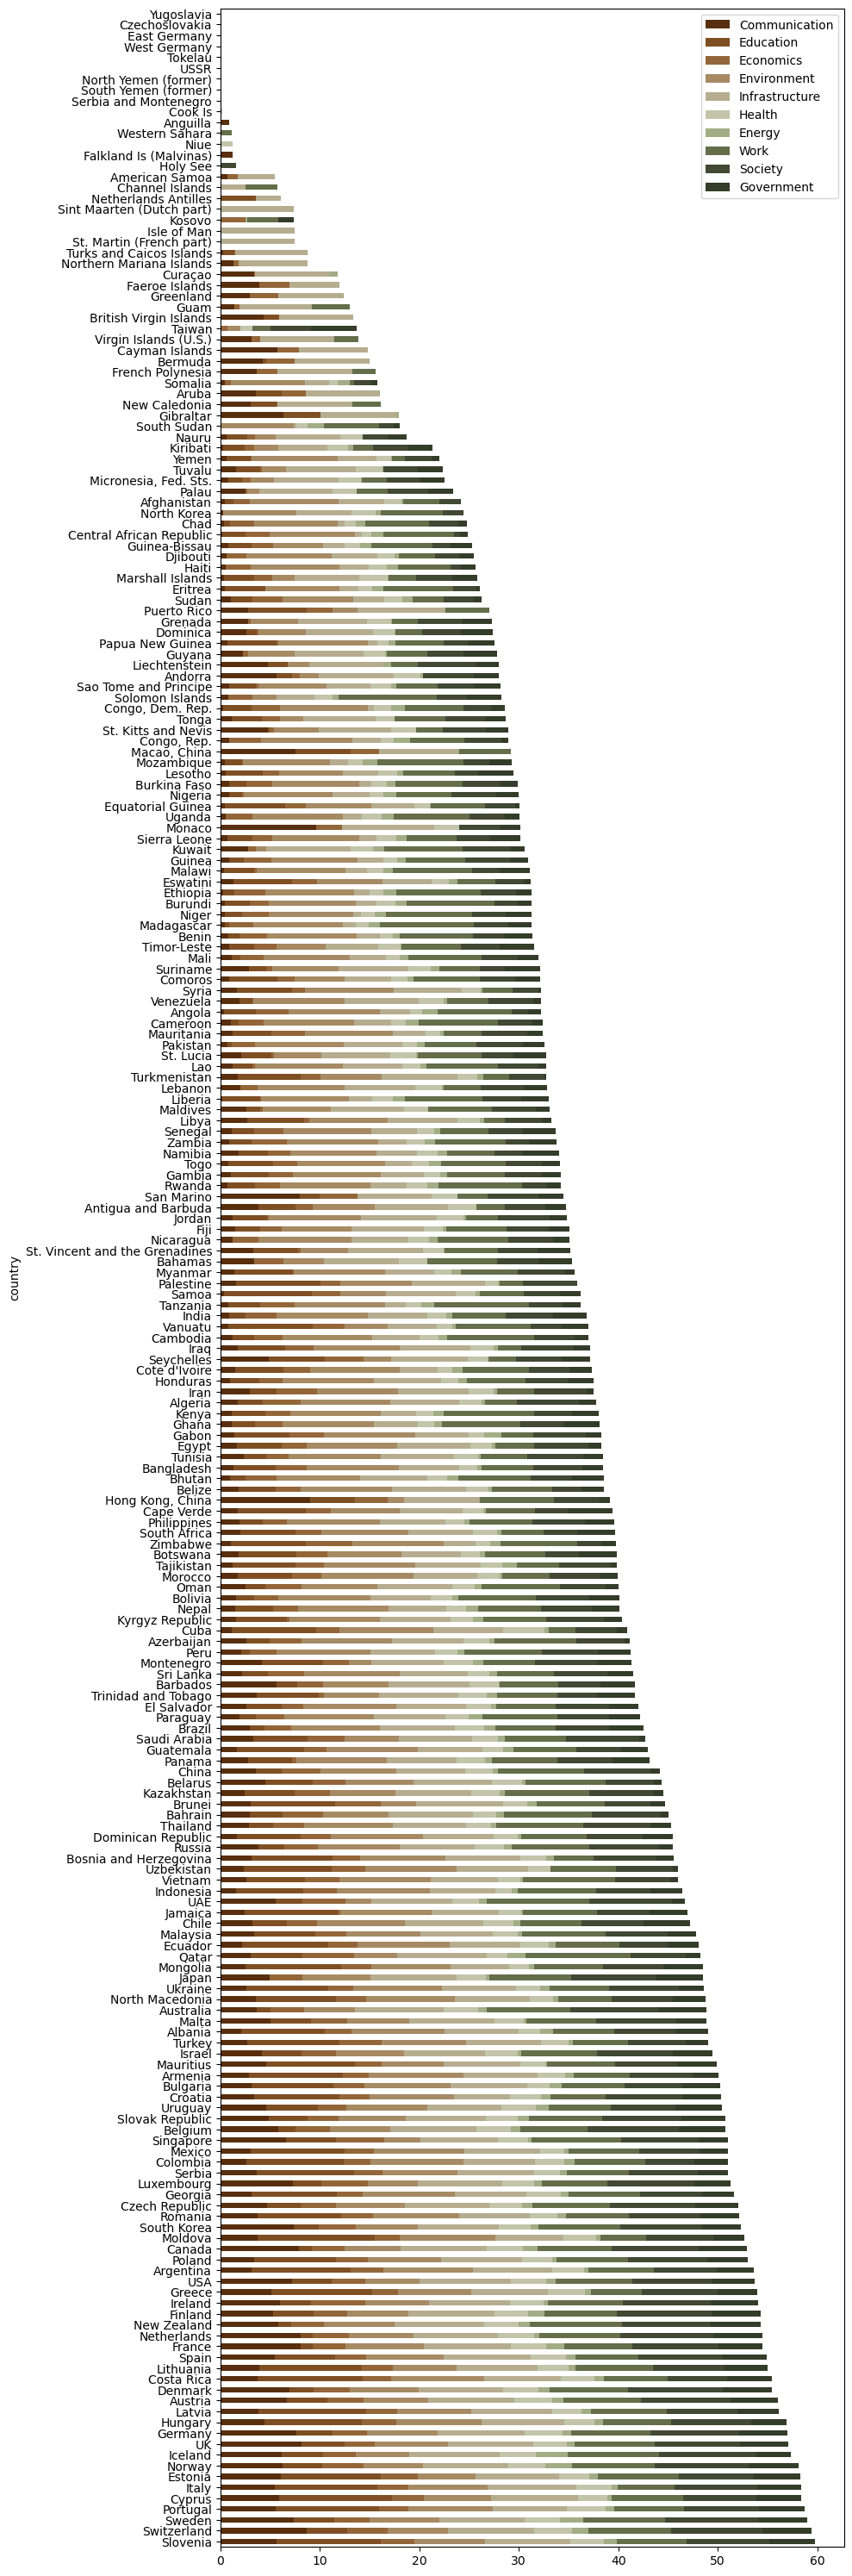

In [152]:
index_plot(df_young)

In [153]:
df_couple = create_df_from_csv("INDEX","df_couple").set_index("country")
df_couple_t = create_df_from_csv("INDEX","df_couple_t").set_index("country")

# sort by total:
df_couple = df_couple.join(df_couple_t[["total"]])
df_couple = df_couple.sort_values(by="total",ascending=False)
df_couple

,Communication,Education,Economics,Environment,Infrastructure,Health,Energy,Work,Society,Government,total
country,,,,,,,,,,,
Switzerland,8.670,1.365,6.030,9.165,8.67,7.56,1.655,5.56,9.16,4.940,62.775
Sweden,7.365,1.345,5.430,10.470,8.54,7.19,2.340,5.47,9.42,4.920,62.490
Norway,6.210,1.345,6.195,8.940,8.63,7.39,2.695,5.53,9.49,4.940,61.365
Germany,7.650,1.205,5.235,10.635,8.77,7.53,0.845,5.32,8.93,4.875,60.995
France,8.025,0.425,4.920,11.805,8.71,7.24,1.755,4.56,8.69,4.430,60.560
...,...,...,...,...,...,...,...,...,...,...,...
Serbia and Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000
USSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000
North Yemen (former),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000


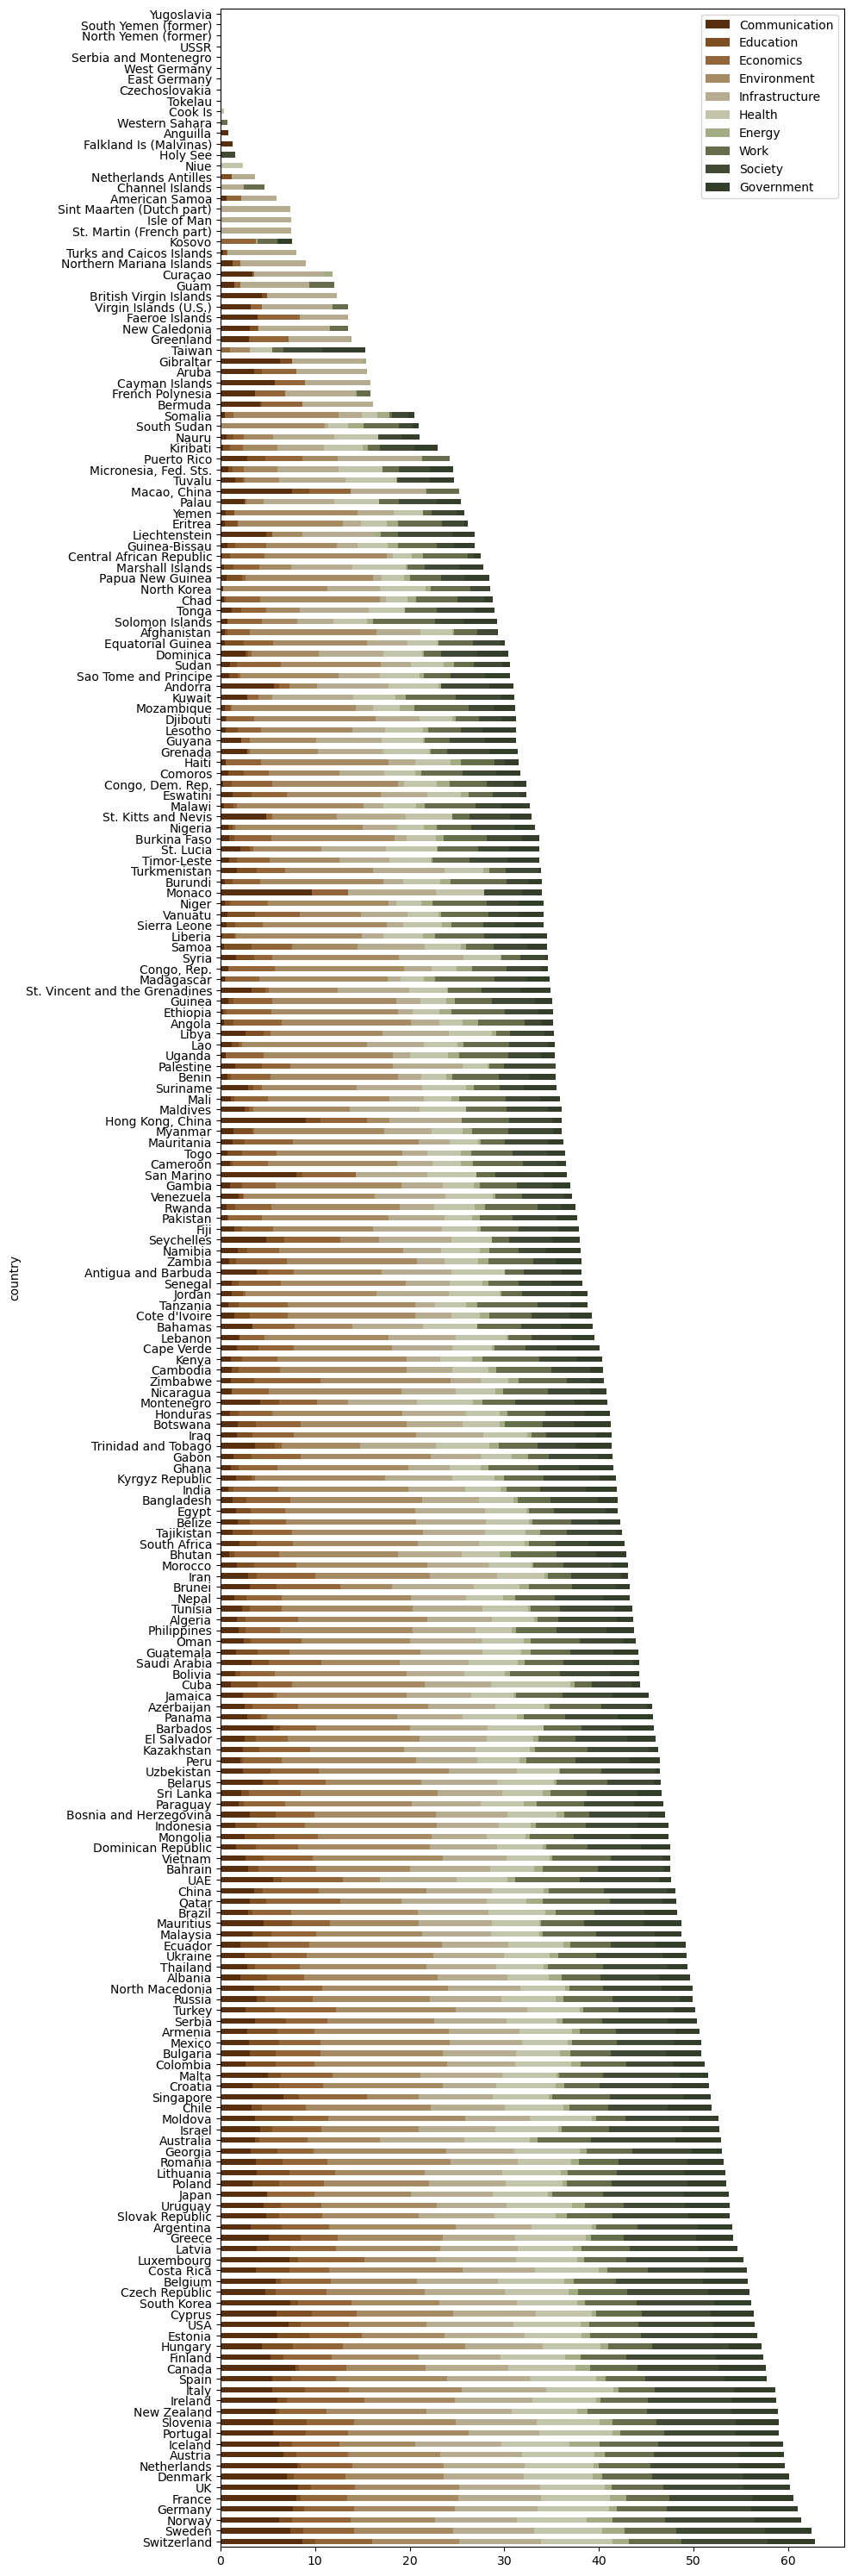

In [154]:
index_plot(df_couple)

In [155]:
df_pension = create_df_from_csv("INDEX","df_pension").set_index("country")
df_pension_t = create_df_from_csv("INDEX","df_pension_t").set_index("country")

# sort by total:
df_pension = df_pension.join(df_pension_t[["total"]])
df_pension = df_pension.sort_values(by="total",ascending=False)
df_pension

,Communication,Education,Economics,Environment,Infrastructure,Health,Energy,Work,Society,Government,total
country,,,,,,,,,,,
Sweden,2.455,1.345,3.62,10.470,8.54,10.785,4.68,2.735,14.130,9.84,68.600
Norway,2.070,1.345,4.13,8.940,8.63,11.085,5.39,2.765,14.235,9.88,68.470
Switzerland,2.890,1.365,4.02,9.165,8.67,11.340,3.31,2.780,13.740,9.88,67.160
Iceland,2.060,1.375,3.34,8.025,9.07,10.845,6.38,3.080,14.490,7.12,65.785
Denmark,2.325,0.800,3.62,10.395,8.45,10.890,2.10,2.630,14.280,9.97,65.460
...,...,...,...,...,...,...,...,...,...,...,...
Tokelau,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
West Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.000
East Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.000


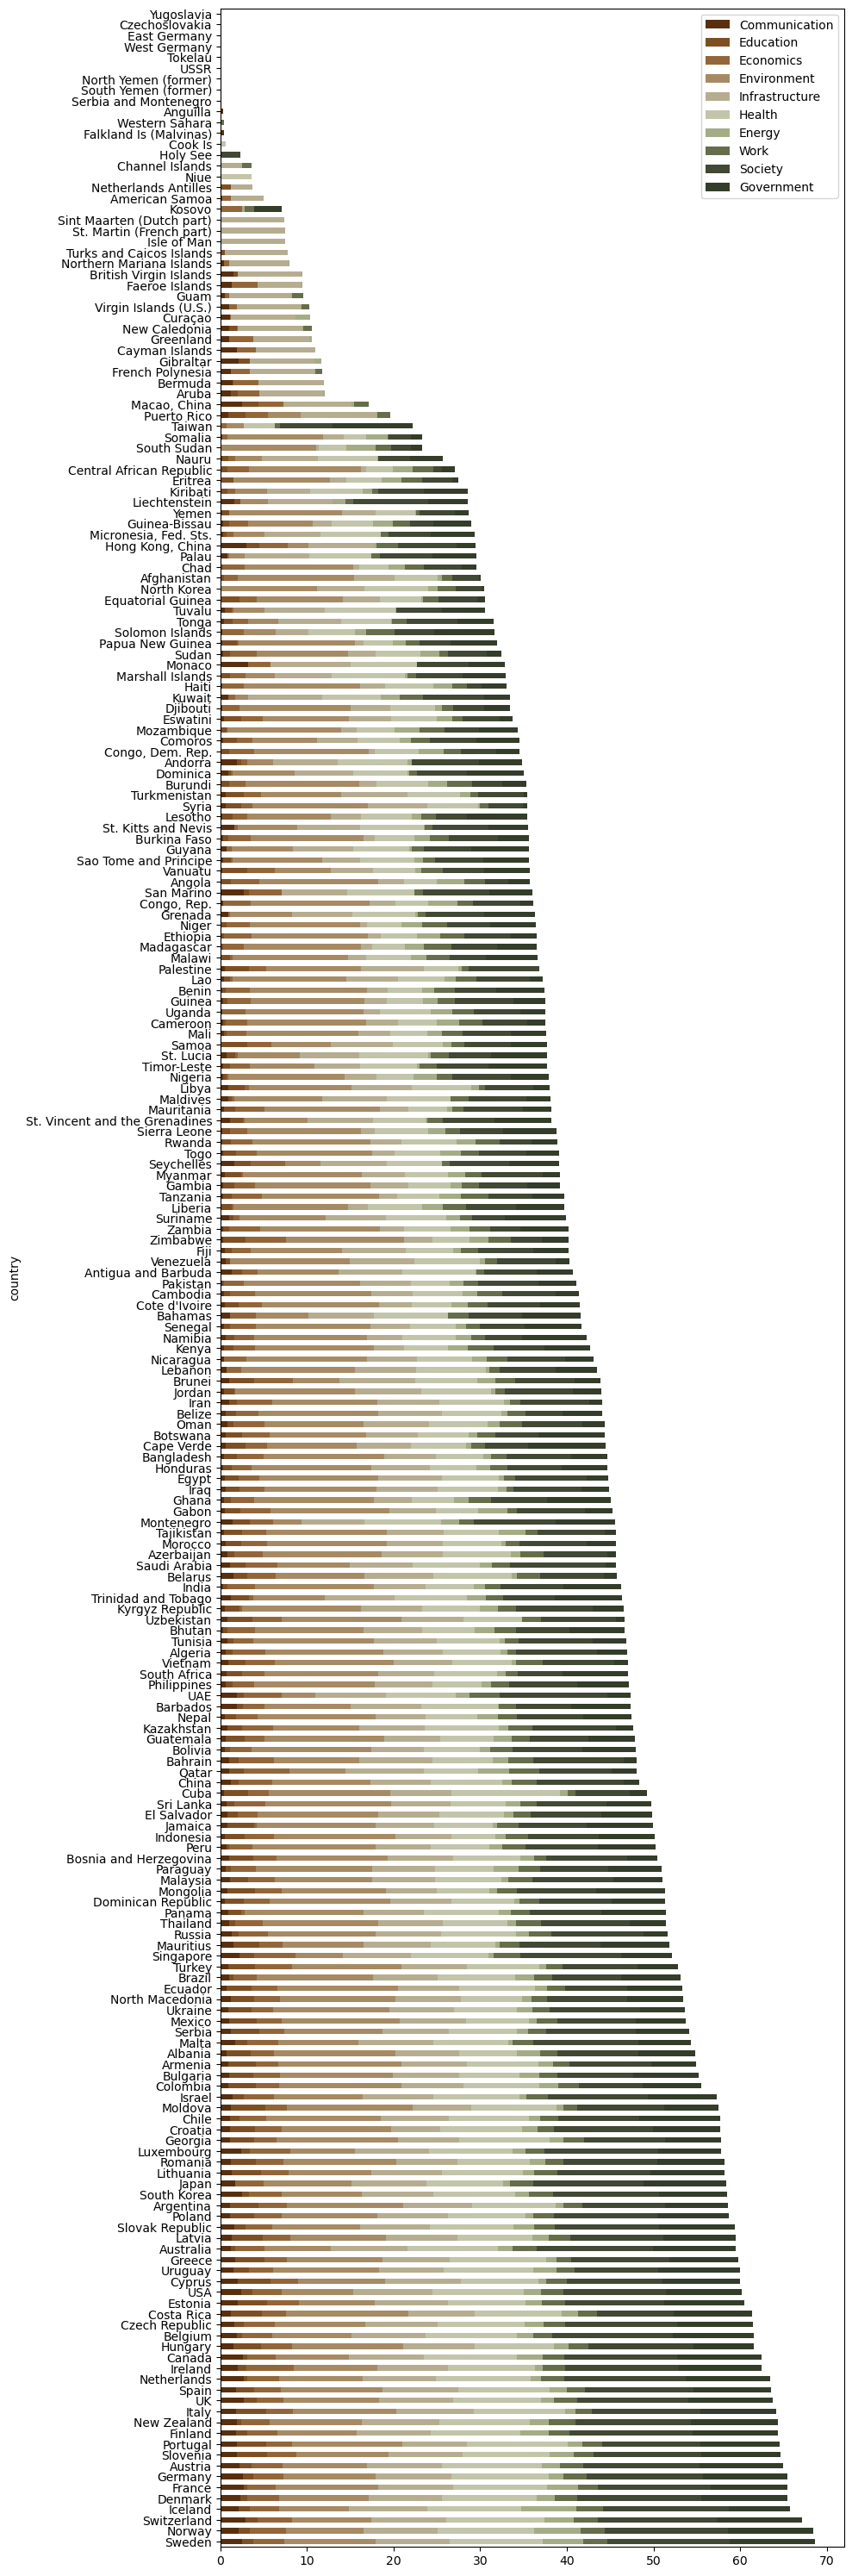

In [156]:
index_plot(df_pension)